In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Load the dataset
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [16]:
# Convert 'Date' to datetime and extract year
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['Year'] = df['Date'].dt.year

In [17]:
# Define 10-year bins starting from 1908
start = 1908
end = df['Year'].max() + 10
bins = np.arange(start, end + 1, 10)

In [18]:
# Create labels like '1908-1918'
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

In [19]:
# Cut into intervals
df['Interval'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)

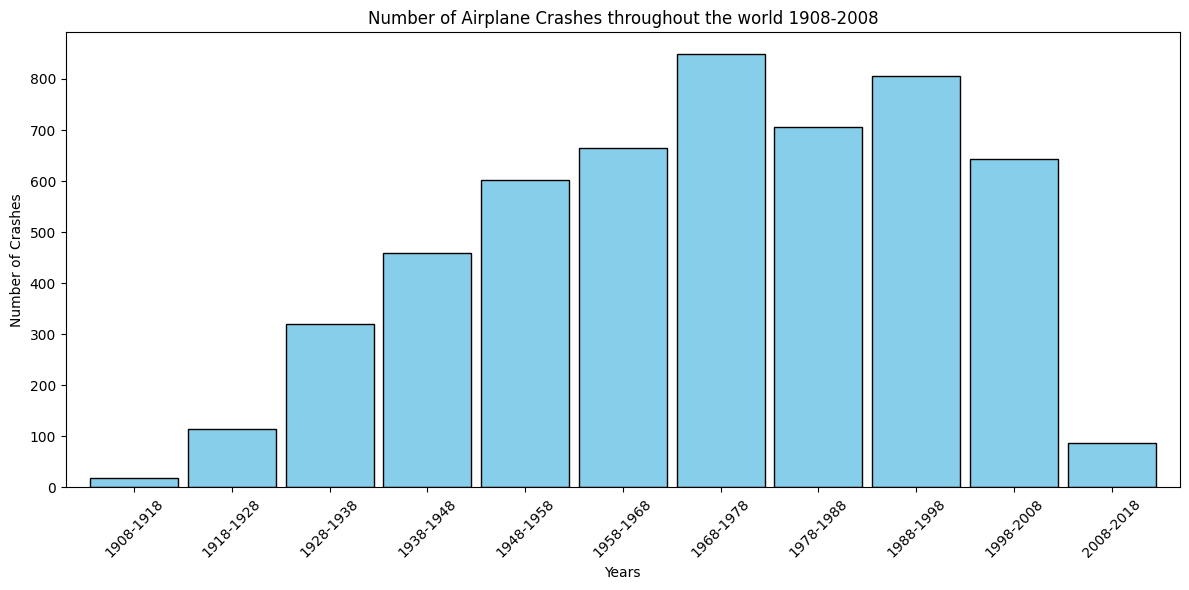

In [27]:
plt.figure(figsize=(12,6))
df['Interval'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', width = 0.9)
plt.title("Number of Airplane Crashes throughout the world 1908-2008")
plt.xlabel("Years")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()